In [93]:
%pylab notebook
import numpy as np
from copy import copy

Populating the interactive namespace from numpy and matplotlib


In [133]:
def td0_valuation_iter(S, initialize, terminal, R, gamma, alpha, V, policy):
    s = initialize()
    while True:
        if terminal(s):
            break
        a = policy[s]
        s2, r = R(s, a)
        Vs2 = 0. if terminal(s2) else V[s2]
        V[s] += alpha * (r + gamma * Vs2 - V[s])
        s = s2

def td0_valuation(S, initialize, terminal, R, gamma, alpha, V, policy, niter):
    """
    S: set of states
    initialize: function () -> initial state
    terminal: function s -> True/False
    R: function (s, a) -> (s2, r) : sample transition
    gamma: discount factor
    alpha: learning rate
    Q: dict (s, a) -> value
    policy: dict s -> a
    """
    for _ in xrange(niter):
        td0_valuation_iter(S, initialize, terminal, R, gamma, alpha, V, policy)


In [134]:
NSTATES = 7
GOAL = NSTATES - 1
INIT = (NSTATES-1)/2
ZERO = 0
S = range(NSTATES)
initialize = lambda: INIT
terminal = lambda s: s in (ZERO, GOAL)
def R(s, a):
    s2 = s + np.random.choice([-1, +1])
    r = int(s2 == GOAL)
    return s2, r
GAMMA = 1.0
V0 = { s: 0 if terminal(s) else 0.5 for s in S }
policy0 = { s: None for s in S } # no actions
Vact = { s: float(s)/(len(S)-1) for s in S }

<IPython.core.display.Javascript object>


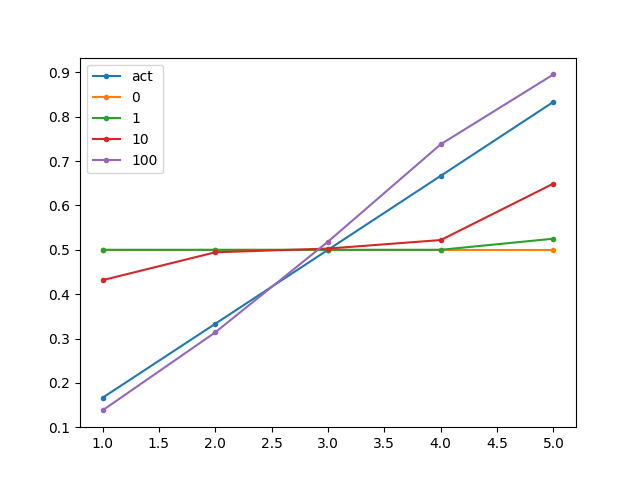

CPU times: user 72 ms, sys: 4 ms, total: 76 ms
Wall time: 75.3 ms


In [144]:
%%time
stats = { }
alpha = 0.05
V = copy(V0)
policy = copy(policy0)
snap = (1, 10, 100)
figure()
plot(S[1:-1], [Vact[s] for s in S[1:-1]], '.-', label="act")
plot(S[1:-1], [V[s] for s in S[1:-1]], '.-', label="0")
for i in xrange(1, 1+100):
    td0_valuation_iter(S, initialize, terminal, R, GAMMA, ALPHA, V, policy)
    if i in snap:
        plot(S[1:-1], [V[s] for s in S[1:-1]], '.-', label=str(i))
legend()

<IPython.core.display.Javascript object>


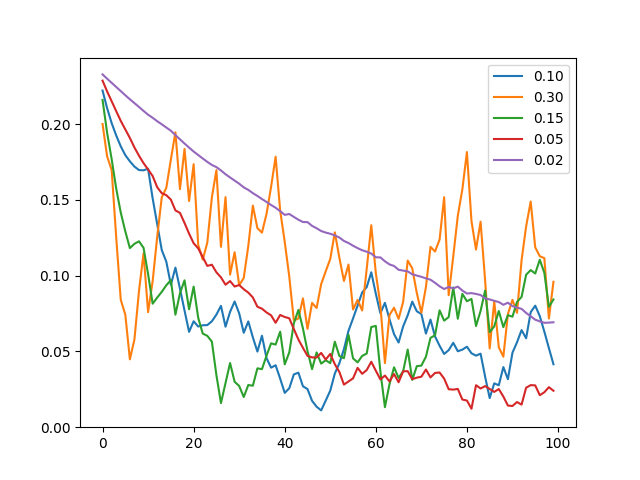

CPU times: user 116 ms, sys: 4 ms, total: 120 ms
Wall time: 116 ms


In [143]:
%%time
stats = { }
for alpha in (0.02, 0.05, 0.1, 0.15, 0.3):
    stats[alpha] = []
    V = copy(V0)
    policy = copy(policy0)
    for _ in xrange(100):
        td0_valuation_iter(S, initialize, terminal, R, GAMMA, alpha, V, policy)
        rmse = np.mean([(V[s]-Vact[s])**2 for s in S if not terminal(s)])**.5
        stats[alpha].append(rmse)

figure()
for alpha in stats:
    plot(stats[alpha], label="%.2f" % alpha)
legend()

<IPython.core.display.Javascript object>


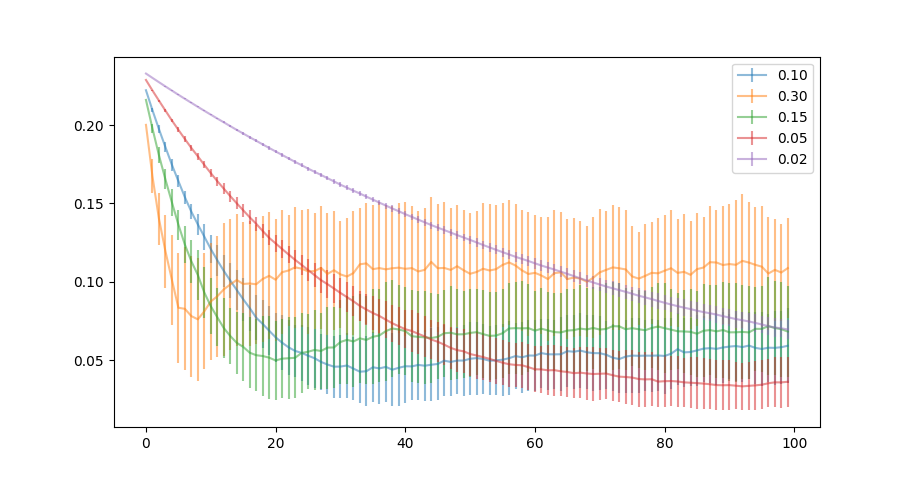

CPU times: user 3.38 s, sys: 12 ms, total: 3.39 s
Wall time: 3.38 s


In [150]:
%%time
NITER = 100
NAVG = 100

rmse_samples = { }
rmse_mean = { }
rmse_std = { }
for alpha in (0.02, 0.05, 0.1, 0.15, 0.3):
    rmse_samples[alpha] = []

    for i in xrange(NAVG):
        rmse_sample = [ ]
        V = copy(V0)
        policy = copy(policy0)
        for j in xrange(NITER):
            td0_valuation_iter(S, initialize, terminal, R, GAMMA, alpha, V, policy)
            rmse = np.mean([(V[s]-Vact[s])**2 for s in S if not terminal(s)])**.5
            rmse_sample.append(rmse)
        rmse_samples[alpha].append(rmse_sample)
    rmse_samples[alpha] = np.array(rmse_samples[alpha])
    rmse_mean[alpha] = np.mean(rmse_samples[alpha], axis=0)
    rmse_std[alpha] = np.std(rmse_samples[alpha], axis=0)

figure()
for alpha in rmse_samples:
    errorbar(range(NITER), rmse_mean[alpha], yerr=rmse_std[alpha], label="%.2f" % alpha, alpha=0.5)
legend()